<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module6/M6_3/1_Download_Stock_Market_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Stock Market Data!
Now let's pull down some stock data as an example.

In [ ]:
# some useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     |████████████████████████████████| 81 kB 5.8 MB/s 
     |████████████████████████████████| 83 kB 2.1 MB/s 
     |████████████████████████████████| 103 kB 92.2 MB/s 
     |████████████████████████████████| 127 kB 86.7 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=d2cf1c44d07f8fdc3530d36fe0d602f93ee8c8071e411dfd0141ce5b23298e68
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=134292f3e77a2bb26fb02f04f94c0b10bc42917c44d41a18c5e7a094ce6e738a
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=b4b1ac1daa3280f288eb1d7bc6b587cb88ee9a991c9589a841b6a00f3922e352
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36ce

In [ ]:
# Assign the ticker list that we want to scrap
tickers_list = ['NFLX','IBM','GE','GOOG','AAPL','KO','AMZN','HD','NKE','WMT','ICE']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '12/27/2017',end_date='01/22/2020',interval='1d') for ticker in tickers_list}

In [ ]:
# take a peak!
dow_prices

{'AAPL':                  open       high        low  ...   adjclose     volume  ticker
 2017-12-27  42.525002  42.695000  42.427502  ...  40.850788   85992800    AAPL
 2017-12-28  42.750000  42.962502  42.619999  ...  40.965725   65920800    AAPL
 2017-12-29  42.630001  42.647499  42.305000  ...  40.522732  103999600    AAPL
 2018-01-02  42.540001  43.075001  42.314999  ...  41.248272  102223600    AAPL
 2018-01-03  43.132500  43.637501  42.990002  ...  41.241089  118071600    AAPL
 ...               ...        ...        ...  ...        ...        ...     ...
 2020-01-14  79.175003  79.392502  78.042503  ...  77.138260  161954400    AAPL
 2020-01-15  77.962502  78.875000  77.387497  ...  76.807701  121923600    AAPL
 2020-01-16  78.397499  78.925003  78.022499  ...  77.769821  108829200    AAPL
 2020-01-17  79.067497  79.684998  78.750000  ...  78.630814  137816400    AAPL
 2020-01-21  79.297501  79.754997  79.000000  ...  78.097939  110843200    AAPL
 
 [519 rows x 7 columns],
 'AMZ

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the NFLX (one sample)
prep_data = pd.DataFrame(dow_prices['NFLX']['adjclose']).rename(columns = {"adjclose":"NFLX"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,NFLX,IBM,GE,GOOG,AAPL,KO,AMZN,HD,NKE,WMT,ICE
2017-12-27,186.240005,128.156570,128.642151,1049.369995,40.850788,40.955177,1182.260010,174.864105,60.666523,92.380875,67.248184
2017-12-28,192.710007,128.918182,128.494125,1048.140015,40.965725,40.767921,1186.099976,174.487091,60.666523,92.511177,67.487442
2017-12-29,191.960007,128.399277,129.160309,1046.400024,40.522732,40.910591,1169.469971,174.257294,60.281025,91.906219,67.525726
2018-01-02,201.070007,129.093903,133.083221,1065.000000,41.248272,40.607414,1189.010010,172.878128,61.186932,91.757294,66.846237
2018-01-03,205.050003,132.642441,134.341507,1082.479980,41.241089,40.518246,1204.199951,173.779160,61.177288,92.557701,67.860680
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-14,338.690002,124.509621,95.610764,1430.880005,77.138260,53.298477,1869.439941,215.190445,101.369423,112.936539,92.062431
2020-01-15,339.070007,125.242996,94.339134,1439.199951,76.807701,53.964714,1862.020020,216.909576,101.241394,112.061668,94.026024
2020-01-16,338.619995,126.489731,94.100700,1451.699951,77.769821,54.078915,1877.939941,220.994949,101.812668,112.664352,94.516914
2020-01-17,339.670013,126.792267,93.862274,1480.390015,78.630814,54.193127,1864.719971,223.979248,102.955177,111.750587,95.007805


In [ ]:
prep_data.shape

(519, 11)

Rather than use the raw time series, let's build a model based on past returns (the difference from the previous day).

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,NFLX,IBM,GE,GOOG,AAPL,KO,AMZN,HD,NKE,WMT,ICE
2017-12-28,0.034740,0.005943,-0.001151,-0.001172,0.002814,-0.004572,0.003248,-0.002156,0.000000,0.001410,0.003558
2017-12-29,-0.003892,-0.004025,0.005185,-0.001660,-0.010814,0.003500,-0.014021,-0.001317,-0.006354,-0.006539,0.000567
2018-01-02,0.047458,0.005410,0.030372,0.017775,0.017905,-0.007411,0.016708,-0.007915,0.015028,-0.001620,-0.010063
2018-01-03,0.019794,0.027488,0.009455,0.016413,-0.000174,-0.002196,0.012775,0.005212,-0.000158,0.008723,0.015176
2018-01-04,0.002829,0.020254,0.020937,0.003621,0.004645,0.014084,0.004476,0.007936,-0.000630,0.000905,0.018897
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-14,-0.000679,-0.005710,-0.007426,-0.005802,-0.013503,-0.002316,-0.011558,-0.002373,0.007439,0.002589,-0.013259
2020-01-15,0.001122,0.005890,-0.013300,0.005815,-0.004285,0.012500,-0.003969,0.007989,-0.001263,-0.007747,0.021329
2020-01-16,-0.001327,0.009955,-0.002527,0.008685,0.012526,0.002116,0.008550,0.018834,0.005643,0.005378,0.005221
2020-01-17,0.003101,0.002392,-0.002534,0.019763,0.011071,0.002112,-0.007040,0.013504,0.011222,-0.008111,0.005194


In [ ]:
return_data.shape

(518, 11)

# Visualize the Time Series

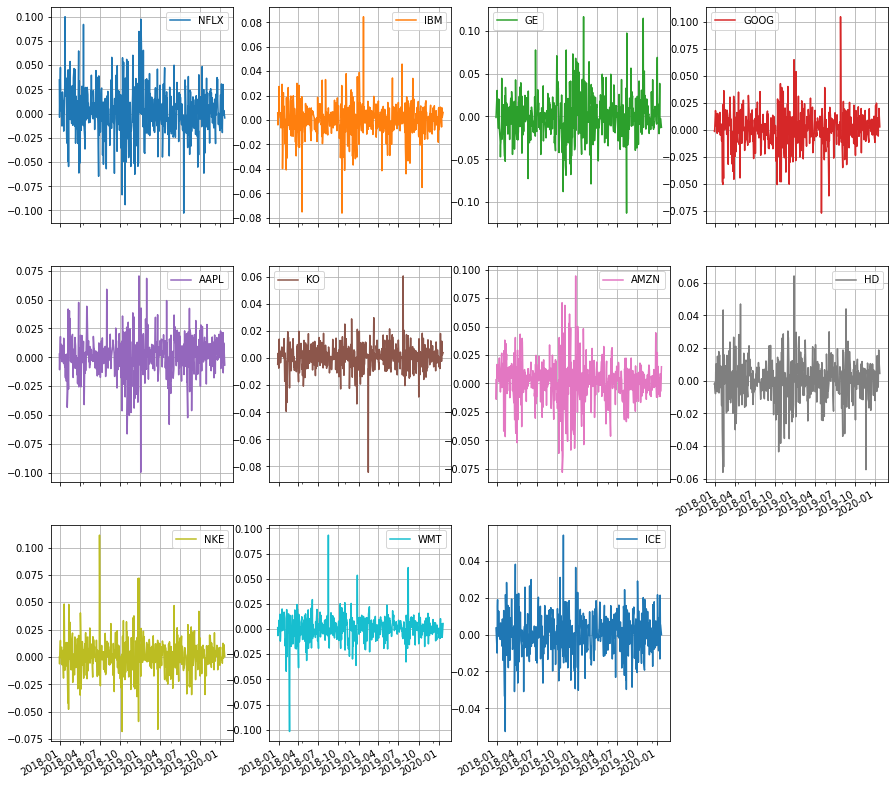

In [ ]:
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

# On Your Own
Go try to run this on the Ms. Womack example.

Make a plot that shows the cumulative percentage returns over time (hint: use Pandas!).